<h1 style='color:black;font-size:30px;text-align:center'>Sobel Edge Detection</h1>

Irwin Sobel has proposed the Sobel edge detection technique in 1970.The Sobel kernel depends on the central difference, but while averaging it gives more weight to central pixel(gaussian filter). One of the advantages of Sobel kernel over Prewit kernel is that it has better noise suppression characteristics. The Sobel edge detection method contains the pair of 3x3 convolution masks which is shown below how it forms with gaussian filter. One mask is just to other rotated by 90 degrees. This mask can deal with the edges which are running 45 degrees to the pixel grid. This mask can be put on distinctly to the input image to give gradient components in every orientation.


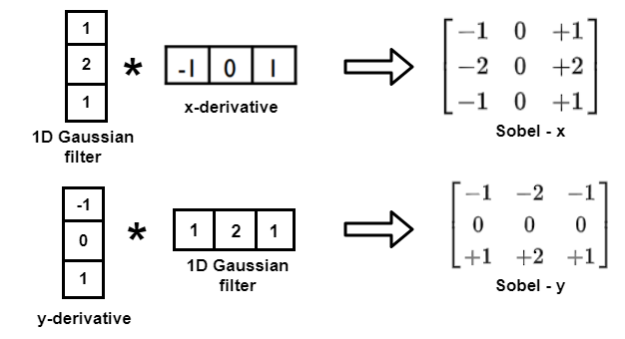

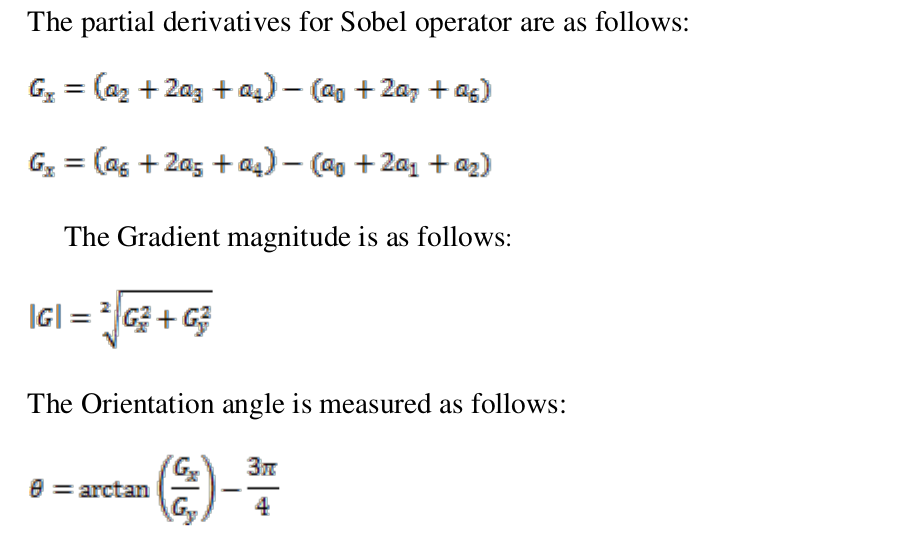

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def convolution2d(image):
   kernel_x=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
   kernel_y=np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
   m, n = kernel_x.shape
   x, y = image.shape
   if m==n:
      x = x - m + 1
      y = y - n + 1
      new_image = np.zeros((x,y))
      for i in range(x):
          for j in range(y):
               edge_x= np.sum((image[i:i+m, j:j+n]*kernel_x))
               edge_y= np.sum((image[i:i+m, j:j+n]*kernel_y))
               new_image[i][j]=np.sqrt((np.square(edge_x)+np.square(edge_y)))
#                new_image[i][j]=(np.abs(edge_x)+np.abs(edge_y))
   return new_image

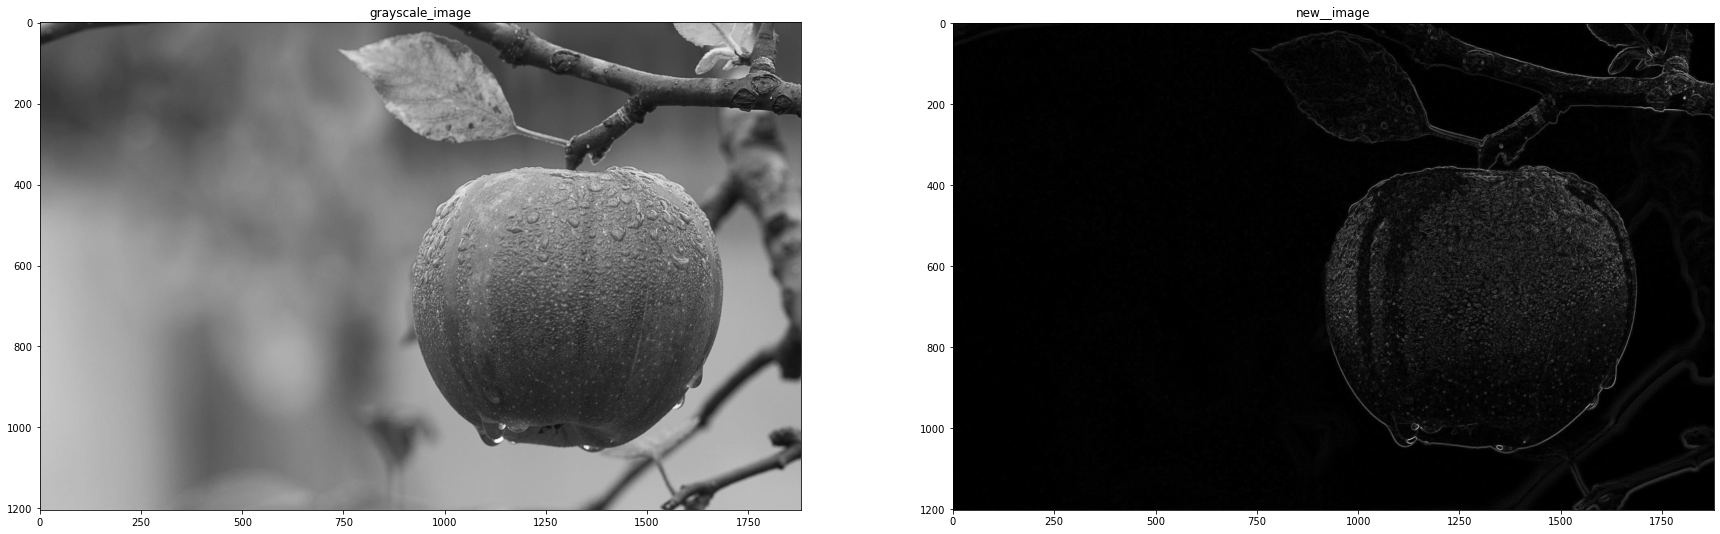

In [8]:
original_image=cv2.imread('apple.jpeg')
grayscale_image=cv2.cvtColor(original_image,cv2.COLOR_BGR2GRAY)
image=cv2.resize(grayscale_image,(600,600))
new_image=convolution2d(grayscale_image)
images=[grayscale_image,new_image]
titles=['grayscale_image','new__image']
plt.figure(figsize=(30,20))
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.imshow(images[i],cmap='gray')
    plt.title(titles[i])
plt.show()